
# Project: Building Employee Churn Model
                By:Ayalew Mekonnen

Most companies have the challenges of providing high quality consultancy service due to high turnover of experienced consultants. The cost of hiring a new employee can also be significantly high. The goal of this work is to model the data and predict why and when active employees are leaving the company by understanding the key predictors of employee churn.

In [1]:
#Import packages 
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors
from sklearn import cluster
from sklearn.metrics.cluster import silhouette_score
from scipy.stats import norm
import plotly.express as px
from plotly.offline import iplot
from IPython.display import display
from sklearn.preprocessing import scale
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

In [2]:
#load cleaned data set as CSV

Employee_data = 'A2_HR_Employee_Data.csv'

Employee_df = pd.read_csv(Employee_data, sep=',', decimal='.')

print('\n Table 1: The following table shows the first few rows of the loaded data.')

display(Employee_df.head())


 Table 1: The following table shows the first few rows of the loaded data.


,EmployeeID,Age,Resigned,BusinessTravel,BusinessUnit,EducationLevel,Gender,JobSatisfaction,MaritalStatus,MonthlyIncome,...,PercentSalaryHike,PerformanceRating,AverageWeeklyHoursWorked,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInRole,YearsSinceLastPromotion,YearsWithCurrManager
0,2824,41,Yes,Travel_Rarely,Sales,2,Female,4,Single,5993,...,11,3,63.0,8,0,1,6,4,0,5
1,1409,49,No,Travel_Frequently,Consultants,1,Male,2,Married,5130,...,23,4,40.0,10,3,3,10,7,1,7
2,5506,37,Yes,Travel_Rarely,Consultants,2,Male,3,Single,2090,...,15,3,50.0,7,3,3,0,0,0,0
3,5012,33,No,Travel_Frequently,Consultants,4,Female,3,Married,2909,...,11,3,48.0,8,3,3,8,7,3,0
4,4657,27,No,Travel_Rarely,Consultants,1,Male,2,Married,3468,...,12,3,40.0,6,3,3,2,2,2,2


In [3]:
# Get basic ideas about the data and save in a list for easy access in subsquent step

print(Employee_df.columns)

Employee_df.shape

Index(['EmployeeID', 'Age', 'Resigned', 'BusinessTravel', 'BusinessUnit',
       'EducationLevel', 'Gender', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'NumCompaniesWorked', 'OverTime', 'PercentSalaryHike',
       'PerformanceRating', 'AverageWeeklyHoursWorked', 'TotalWorkingYears',
       'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany',
       'YearsInRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')


(1470, 22)

In [4]:
# Get information about the data types

Employee_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   EmployeeID                1470 non-null   int64  
 1   Age                       1470 non-null   int64  
 2   Resigned                  1470 non-null   object 
 3   BusinessTravel            1470 non-null   object 
 4   BusinessUnit              1470 non-null   object 
 5   EducationLevel            1470 non-null   int64  
 6   Gender                    1470 non-null   object 
 7   JobSatisfaction           1470 non-null   int64  
 8   MaritalStatus             1470 non-null   object 
 9   MonthlyIncome             1470 non-null   int64  
 10  NumCompaniesWorked        1470 non-null   int64  
 11  OverTime                  1470 non-null   object 
 12  PercentSalaryHike         1470 non-null   int64  
 13  PerformanceRating         1470 non-null   int64  
 14  AverageW

The data set contains numerical data types (float and Integers) and some of them are object. We are able to convert these object type into appropriate data types.The employee ID column obviously do not affect resignation and hence we droped this redundant column.

In [5]:
# Drop redundant column

Employee_df = Employee_df.drop(['EmployeeID'], axis=1) 

# Check if dropping succesful

print('\n Table 2: The following is head of the raw data with out Employee ID column.')

display(Employee_df.head())  


 Table 2: The following is head of the raw data with out Employee ID column.


,Age,Resigned,BusinessTravel,BusinessUnit,EducationLevel,Gender,JobSatisfaction,MaritalStatus,MonthlyIncome,NumCompaniesWorked,...,PercentSalaryHike,PerformanceRating,AverageWeeklyHoursWorked,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,Sales,2,Female,4,Single,5993,8,...,11,3,63.0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,Consultants,1,Male,2,Married,5130,1,...,23,4,40.0,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,Consultants,2,Male,3,Single,2090,6,...,15,3,50.0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,Consultants,4,Female,3,Married,2909,1,...,11,3,48.0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,Consultants,1,Male,2,Married,3468,9,...,12,3,40.0,6,3,3,2,2,2,2


In [6]:
Employee_df=Employee_df.copy()

In [7]:
# Cast the data types into appropriate categorical and integer data types

str_cols = list(Employee_df[['Resigned','BusinessTravel','BusinessUnit','Gender','MaritalStatus','OverTime',
                              'JobSatisfaction','EducationLevel','PerformanceRating','WorkLifeBalance']])
for cols in str_cols:
    Employee_df[cols] = Employee_df[cols].astype("category")
    
Employee_df.dtypes

Age                            int64
Resigned                    category
BusinessTravel              category
BusinessUnit                category
EducationLevel              category
Gender                      category
JobSatisfaction             category
MaritalStatus               category
MonthlyIncome                  int64
NumCompaniesWorked             int64
OverTime                    category
PercentSalaryHike              int64
PerformanceRating           category
AverageWeeklyHoursWorked     float64
TotalWorkingYears              int64
TrainingTimesLastYear          int64
WorkLifeBalance             category
YearsAtCompany                 int64
YearsInRole                    int64
YearsSinceLastPromotion        int64
YearsWithCurrManager           int64
dtype: object

# Data Exploration

Data exploration has been conducted through visualization and descriptive statistical techniques. In univariate analysis, numerical and categorical features were explored individually to understand the distribution of values in sample population.
In bivariate analysis, the relationship between features mainly focusing on resignation as a target has been explored. The goal is to understand whether these features have a great influence on staff turnover in the company. The strength of this relationship has been explored by using the correlation coefficients which lies between -1 to +1.


## Explore each column using descriptive analytics/graphs

The descriptive analysis of dataset characteristics was conducted by relating each feature to the target variable “Resigned”

In [8]:
# Get an overview of the descriptive statistics for numerical features
Employee_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,1470.0,36.923810,9.135373,18.0,30.0,36.0,43.0,60.0
MonthlyIncome,1470.0,6502.931293,4707.956783,1009.0,2911.0,4919.0,8379.0,19999.0
NumCompaniesWorked,1470.0,2.693197,2.498009,0.0,1.0,2.0,4.0,9.0
PercentSalaryHike,1470.0,15.209524,3.659938,11.0,12.0,14.0,18.0,25.0
AverageWeeklyHoursWorked,1470.0,43.042177,5.389864,40.0,40.0,40.0,47.0,71.0
TotalWorkingYears,1470.0,11.279592,7.780782,0.0,6.0,10.0,15.0,40.0
TrainingTimesLastYear,1470.0,2.799320,1.289271,0.0,2.0,3.0,3.0,6.0
YearsAtCompany,1470.0,7.008163,6.126525,0.0,3.0,5.0,9.0,40.0
YearsInRole,1470.0,4.229252,3.623137,0.0,2.0,3.0,7.0,18.0
YearsSinceLastPromotion,1470.0,2.187755,3.222430,0.0,0.0,1.0,3.0,15.0


In [9]:
# Get an overview of the descriptive statistics for those employe who resigned
resigned = Employee_df.groupby('Resigned')
resigned.mean().T

Resigned,No,Yes
Age,37.561233,33.607595
MonthlyIncome,6832.739659,4787.092827
NumCompaniesWorked,2.645580,2.940928
PercentSalaryHike,15.231144,15.097046
AverageWeeklyHoursWorked,42.289538,46.957806
TotalWorkingYears,11.862936,8.244726
TrainingTimesLastYear,2.832928,2.624473
YearsAtCompany,7.369019,5.130802
YearsInRole,4.484185,2.902954
YearsSinceLastPromotion,2.234388,1.945148


Employee who left the company are younger, has low monthly income, worked more hours, low training rates compared to the current employees.

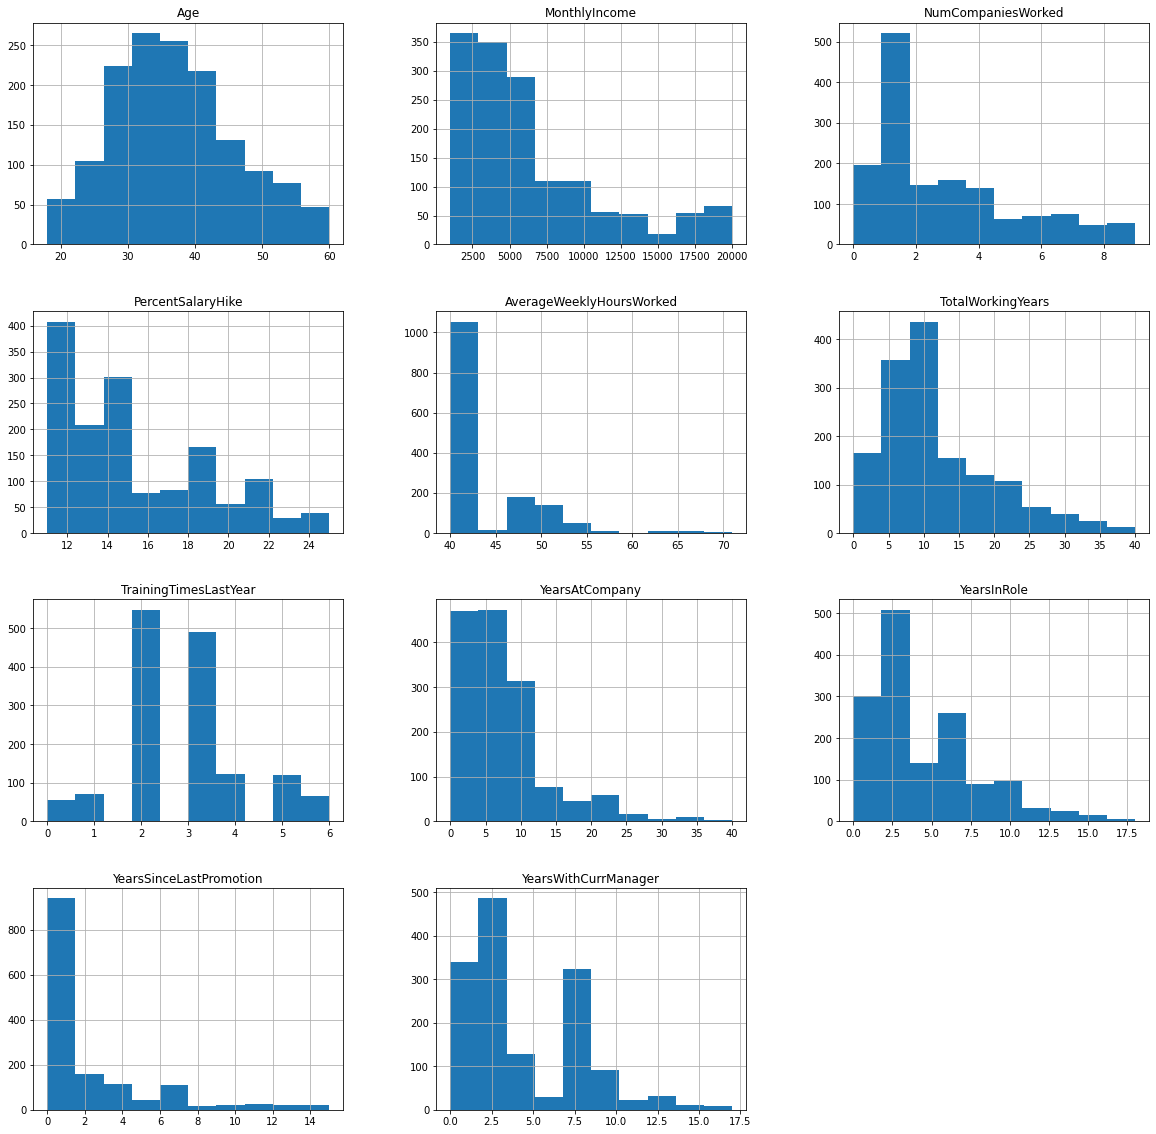

In [10]:
# Explore the distribution of numeric variables 

Employee_df.hist(figsize=(20,20))

plt.show()


The age of the employee is normally distributed with slight right skewed. Most of the numerical features for example 'MonthlyIncome,'NumCompaniesWorked', 'PercentSalaryHike','YearsSinceLastPromotion' are not normally distributed and they are right skewed with a long tail. These features required transformation before they are directly fit into the model.

## Age

In [11]:
# Descriptive analysis of age between former and current employee

print('\n Summary statistics of age for ex-employee:') 

print(Employee_df.loc[Employee_df['Resigned'] == 'Yes', 'Age'].describe())

print('\n Summary statistics of age for current employee:') 
Employee_df.loc[Employee_df['Resigned'] == 'No', 'Age'].describe()


 Summary statistics of age for ex-employee:
count    237.000000
mean      33.607595
std        9.689350
min       18.000000
25%       28.000000
50%       32.000000
75%       39.000000
max       58.000000
Name: Age, dtype: float64

 Summary statistics of age for current employee:


count    1233.000000
mean       37.561233
std         8.888360
min        18.000000
25%        31.000000
50%        36.000000
75%        43.000000
max        60.000000
Name: Age, dtype: float64

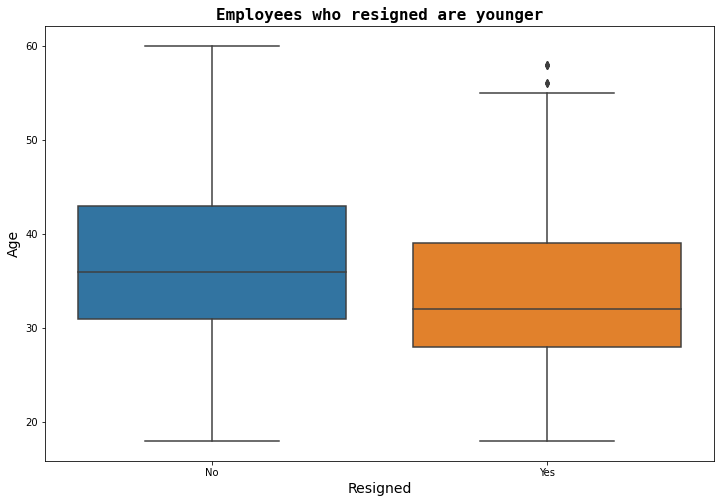

In [12]:
# Plot age by resignation 

fig=plt.figure(figsize=(12,8))

sns.boxplot(data=Employee_df, y='Age', x= 'Resigned')

plt.title('Employees who resigned are younger', fontsize=16, fontweight ='bold', fontfamily='monospace')

plt.xlabel("Resigned", size=14)

plt.ylabel("Age", size=14)

plt.show()

fig.savefig('fig_10.jpg')

Resigned employees have an average age of 33.60 years, while the current employee have an avearge of 37.56 years. This suggested that younger employee are more likely to leave the company. 

## Categorical Univariate and Bivariate Analysis

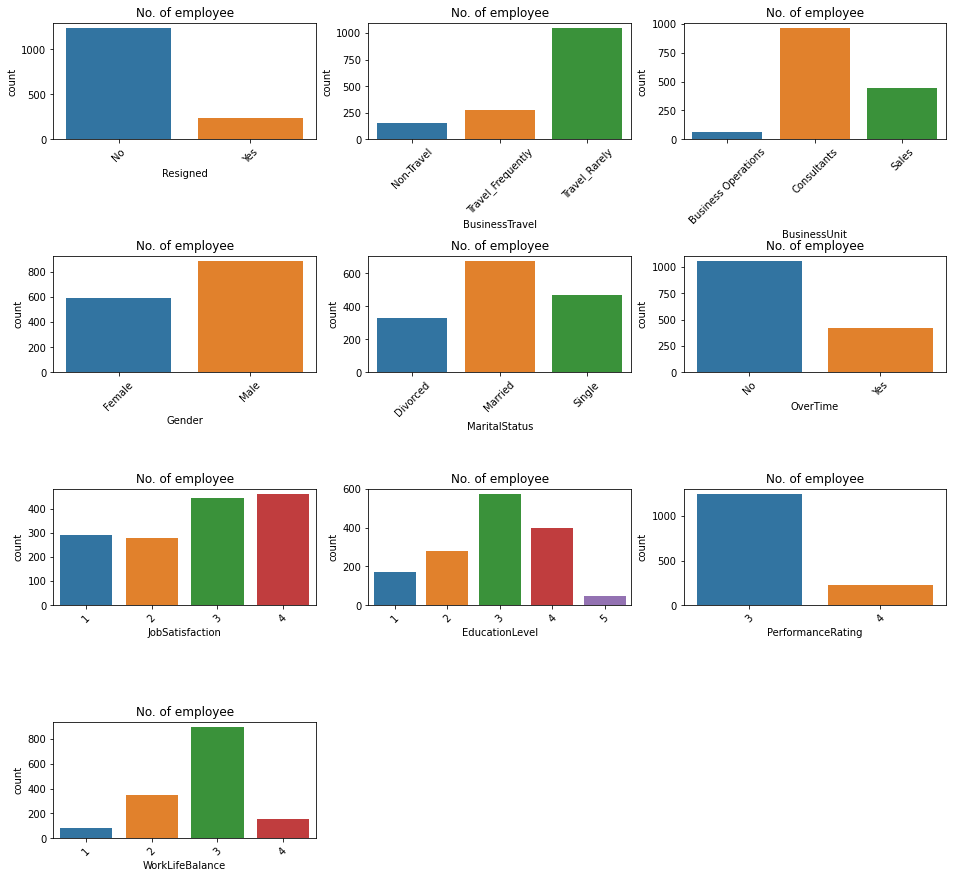

In [13]:
# Univariate Analysis for CountPlot for categorical variables

cat_features = Employee_df[['Resigned','BusinessTravel','BusinessUnit','Gender','MaritalStatus','OverTime',
                              'JobSatisfaction','EducationLevel','PerformanceRating','WorkLifeBalance']]

fig=plt.subplots(figsize=(16,15))
for i, j in enumerate(cat_features):
    plt.subplot(4, 3, i+1)
    plt.subplots_adjust(hspace = 1.0)
    sns.countplot(x=j,data = cat_features)
    plt.xticks(rotation=45)
    plt.title("No. of employee")

The following are points can be derived from the above visualizations.
 
* A larger proportion of employees are married and travel rarely.
* The consultant business unit has the maximum number of employee followed by sales and business operations
* Most of the employees are happy in their job getting either a score 3 or 4.
* None of the employee have got a performance rating 1 and 2 though it is not clear if rating is out of 3 and 4 only.
* majority of employee falls under the work life balance score of 3, followed by 2 and 4.


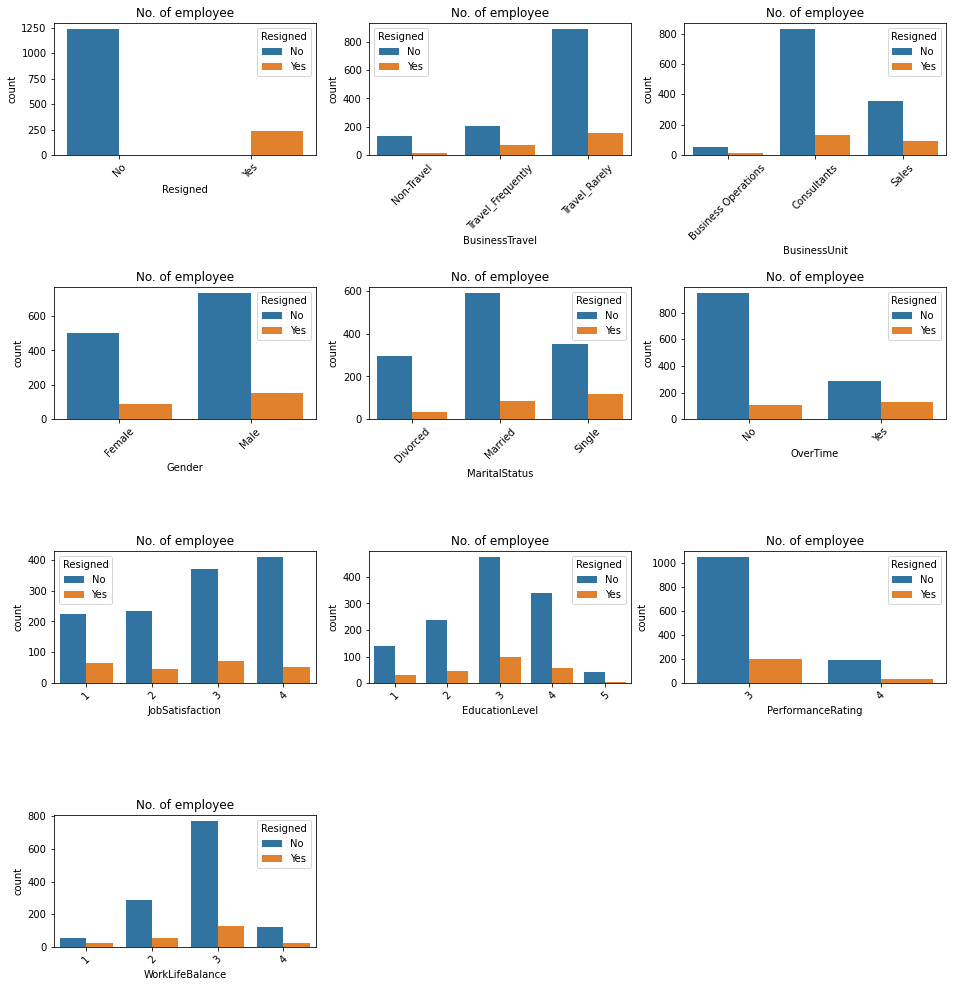

In [14]:
# Bivariate Analysis for CountPlot for categorical variables

fig=plt.subplots(figsize=(16,17))
for i, j in enumerate(cat_features):
    plt.subplot(4, 3, i+1)
    plt.subplots_adjust(hspace = 1.0)
    sns.countplot(x=j,data = cat_features, hue='Resigned')
    plt.xticks(rotation=45)
    plt.title("No. of employee")

Similarly, the following points can be observed from the above visulaiztions.
* Most of the employees who left are single, had overtime commitment,less satified in their job with a score of 1, and either had low or high worklife balance score. 

Let us explore further the proportion of resigned employees in selected few features in detail.


## Business unit

<Figure size 864x576 with 0 Axes>

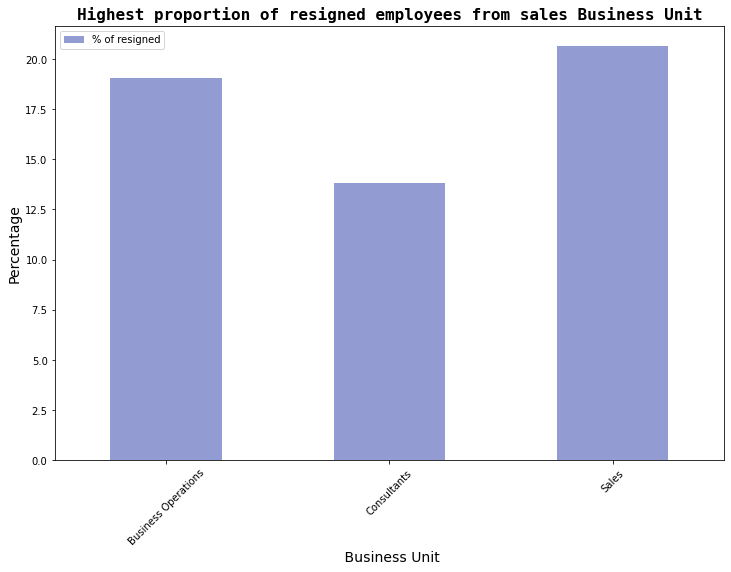

In [15]:
# Proportion of resigned employees by Business Unit

df_BU = pd.DataFrame(columns=["Business", "% of resigned"])
i=0
for field in list(Employee_df['BusinessUnit'].unique()):
    ratio = Employee_df[(Employee_df['BusinessUnit']==field)&(Employee_df['Resigned']=="Yes")].shape[0] / Employee_df[Employee_df['BusinessUnit']==field].shape[0]
    df_BU.loc[i] = (field, ratio*100)
    i += 1
    #print("In {}, the ratio of leavers is {:.2f}%".format(field, ratio*100))    

fig = plt.figure(figsize=(12,8))

df_Bu = df_BU.groupby(by="Business").sum()
    
df_Bu.plot(kind='bar',alpha=0.6, color='#4958B5',figsize=(12,8))

plt.title('Highest proportion of resigned employees from sales Business Unit', fontsize=16, fontweight ='bold', fontfamily='monospace')

plt.xlabel(" Business Unit", size=14)

plt.xticks(rotation=45)

plt.ylabel("Percentage", size=14)

plt.show()

fig.savefig('fig_7.jpg')

## Overtime

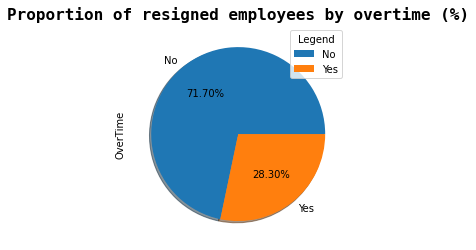

In [16]:
# Committements of overtime

Employee_df['OverTime'].value_counts().plot(kind='pie', shadow=True, autopct='{:.2f}%'.format)

plt.legend(title='Legend')

plt.title('Proportion of resigned employees by overtime (%)', fontsize=16, fontweight ='bold', fontfamily='monospace')

plt.show()


Quite large proprtion (28%) of employees work beyond the normal working hours.

<Figure size 864x576 with 0 Axes>

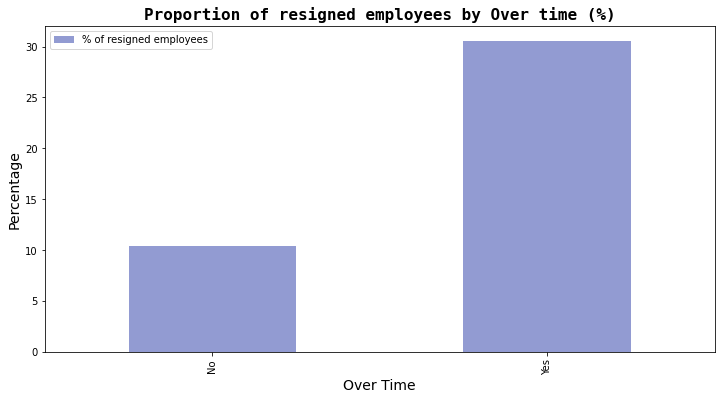

In [17]:
# Overtime 

Overtime_df = pd.DataFrame(columns=['OverTime', "% of resigned employees"])
i=0
for OverTime in list(Employee_df['OverTime'].unique()):
    ratio = Employee_df[(Employee_df['OverTime']== OverTime) & (Employee_df['Resigned']=='Yes')].shape[0] /Employee_df[Employee_df['OverTime']==OverTime].shape[0]
    Overtime_df.loc[i] = (OverTime, ratio*100)
    i += 1
    # print("In {}, the ratio of resigned employee is {:.2f}%".format(OverTime, ratio*100))    

def plot(ax):
    for i in ax.patches:
        x = i.get_x()+0.07 #adjust the numbers (higher numbers = to the right, lower = to the left)
        height = i.get_height()+0.1 #adjust the numbers (higher numbers = up, lower = down)
        value = float("{0:.2f}".format(i.get_height()))

        ax.text(x, height, value, fontsize=10,color='red')

    
fig=plt.figure(figsize=(12,8))

OT_df = Overtime_df.groupby(by="OverTime").sum()
    
OT_df.plot(kind='bar',alpha=0.6, color='#4958B5',figsize=(12,6))

plt.title('Proportion of resigned employees by Over time (%)', fontsize=16, fontweight ='bold', fontfamily='monospace')

plt.xlabel("Over Time", size=14)

plt.ylabel("Percentage", size=14)

plt.show()

fig.savefig('fig_5.jpg')

## Business Travel

<Figure size 864x576 with 0 Axes>

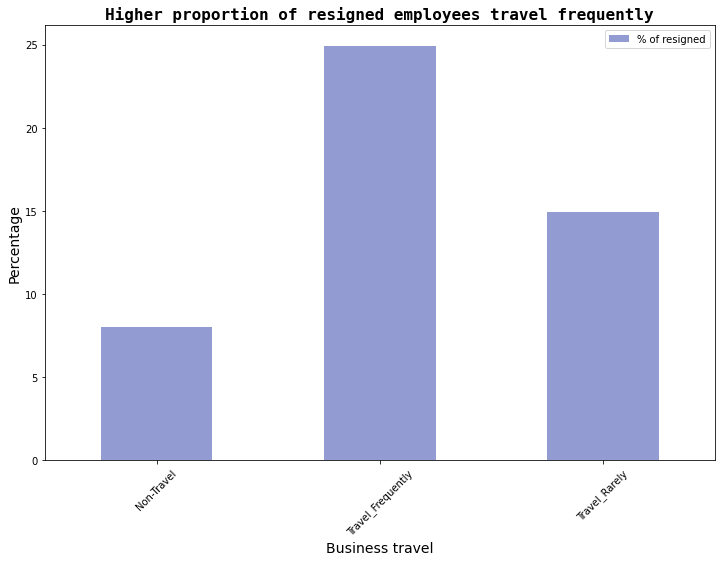

In [18]:
# Proportion of resigned employee by business travel

df_BT = pd.DataFrame(columns=["Business_Travel", "% of resigned"])

i=0
for field in list(Employee_df['BusinessTravel'].unique()):
    ratio = Employee_df[(Employee_df['BusinessTravel']==field)&(Employee_df['Resigned']=="Yes")].shape[0] / Employee_df[Employee_df['BusinessTravel']==field].shape[0]
    df_BT.loc[i] = (field, ratio*100)
    i += 1
    #print("In {}, the ratio of leavers is {:.2f}%".format(field, ratio*100))    

fig=plt.figure(figsize=(12,8))
   
df_BT.groupby(by="Business_Travel").sum().plot(kind='bar',alpha=0.6, color='#4958B5', figsize=(12,8))

plt.title('Higher proportion of resigned employees travel frequently', fontsize=16, fontweight ='bold', fontfamily='monospace')

plt.xlabel('Business travel', size=14)

plt.xticks(rotation=45)

plt.ylabel("Percentage", size=14)

plt.show()

fig.savefig('fig_9.jpg')

From the above visulization, about a quarter of employee(25%) who travel frequently, left the company compared to the 8% who did not travel. It seems to like that the frequent travel affecting their family time as most of the employees are married.

## Job Satisfaction

<Figure size 864x576 with 0 Axes>

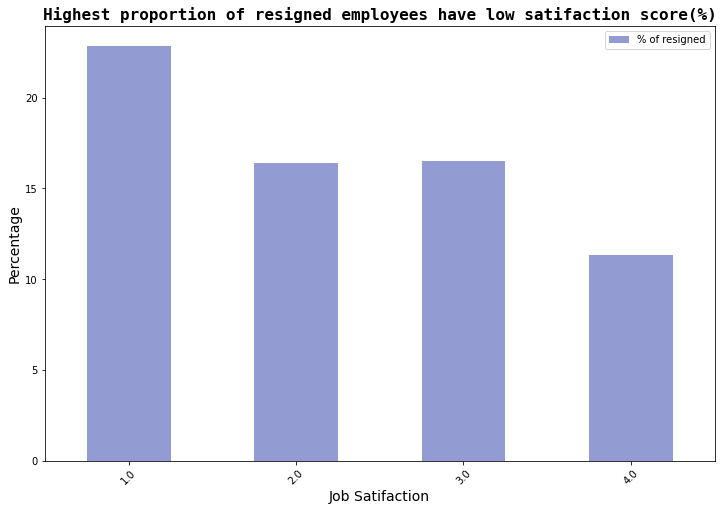

In [19]:
# Proportion of resigned employees by Job Satifaction

df_JS = pd.DataFrame(columns=["Job_Satisfaction", "% of resigned"])

i=0
for field in list(Employee_df['JobSatisfaction'].unique()):
    ratio = Employee_df[(Employee_df['JobSatisfaction']==field)&(Employee_df['Resigned']=="Yes")].shape[0] / Employee_df[Employee_df['JobSatisfaction']==field].shape[0]
    df_JS.loc[i] = (field, ratio*100)
    i += 1
    #print("In {}, the ratio of leavers is {:.2f}%".format(field, ratio*100))    

fig=plt.figure(figsize=(12,8))

df_Js = df_JS.groupby(by='Job_Satisfaction').sum()

df_Js.plot(kind='bar',alpha=0.6, color='#4958B5', figsize=(12,8))

plt.title('Highest proportion of resigned employees have low satifaction score(%)', fontsize=16, fontweight ='bold', fontfamily='monospace')

plt.xlabel('Job Satifaction', size=14)

plt.xticks(rotation=45)

plt.ylabel("Percentage", size=14)

plt.show()

fig.savefig('fig_12.jpg')

## Work life Balance 

<Figure size 864x576 with 0 Axes>

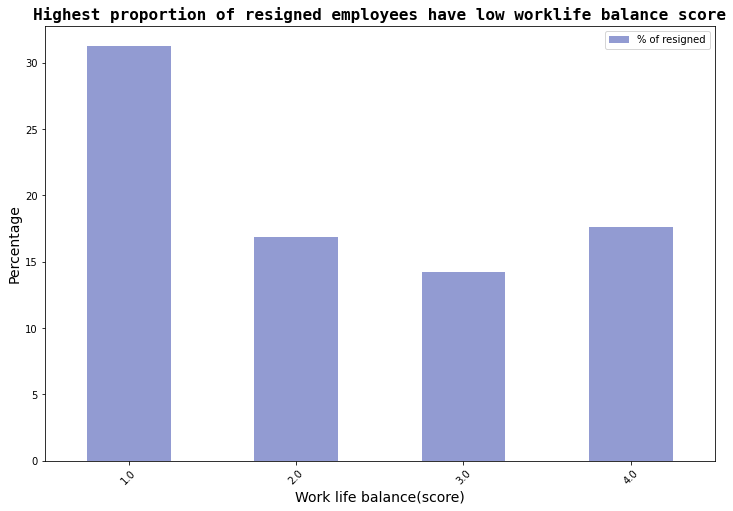

In [20]:
# Proportion of resigned employees by work life balance

df_WB = pd.DataFrame(columns=["Work", "% of resigned"])

i=0
for field in list(Employee_df['WorkLifeBalance'].unique()):
    ratio = Employee_df[(Employee_df['WorkLifeBalance']==field)&(Employee_df['Resigned']=="Yes")].shape[0] / Employee_df[Employee_df['WorkLifeBalance']==field].shape[0]
    df_WB.loc[i] = (field, ratio*100)
    i += 1
    #print("In {}, the ratio of leavers is {:.2f}%".format(field, ratio*100))    

fig=plt.figure(figsize=(12,8))
    
df_WB.groupby(by="Work").sum().plot(kind='bar',alpha=0.6, color='#4958B5', figsize=(12,8))

plt.title('Highest proportion of resigned employees have low worklife balance score', fontsize=16, fontweight ='bold', fontfamily='monospace')

plt.xlabel('Work life balance(score)', size=14)

plt.xticks(rotation=45)

plt.ylabel("Percentage", size=14)

plt.show()

fig.savefig('fig_9.jpg')

More than 30% resigned employes have worklife balance score 1, followed by score 2, and 4, suggesting that the work life balance could be one factor for resignation.   

## Explore relationships between all pairs of attributes using a graph

The descriptive analysis of dataset characteristics was conducted by relating each feature to the target variable “Resigned”

In [21]:
# Get an overview of the descriptive statistics for those employee who resigned
resigned = Employee_df.groupby('Resigned')
resigned.mean().T

Resigned,No,Yes
Age,37.561233,33.607595
MonthlyIncome,6832.739659,4787.092827
NumCompaniesWorked,2.645580,2.940928
PercentSalaryHike,15.231144,15.097046
AverageWeeklyHoursWorked,42.289538,46.957806
TotalWorkingYears,11.862936,8.244726
TrainingTimesLastYear,2.832928,2.624473
YearsAtCompany,7.369019,5.130802
YearsInRole,4.484185,2.902954
YearsSinceLastPromotion,2.234388,1.945148


Employee who left the company are younger, has low monthly income, worked more hours, low training rates compared to the current employees.

<Figure size 864x576 with 0 Axes>

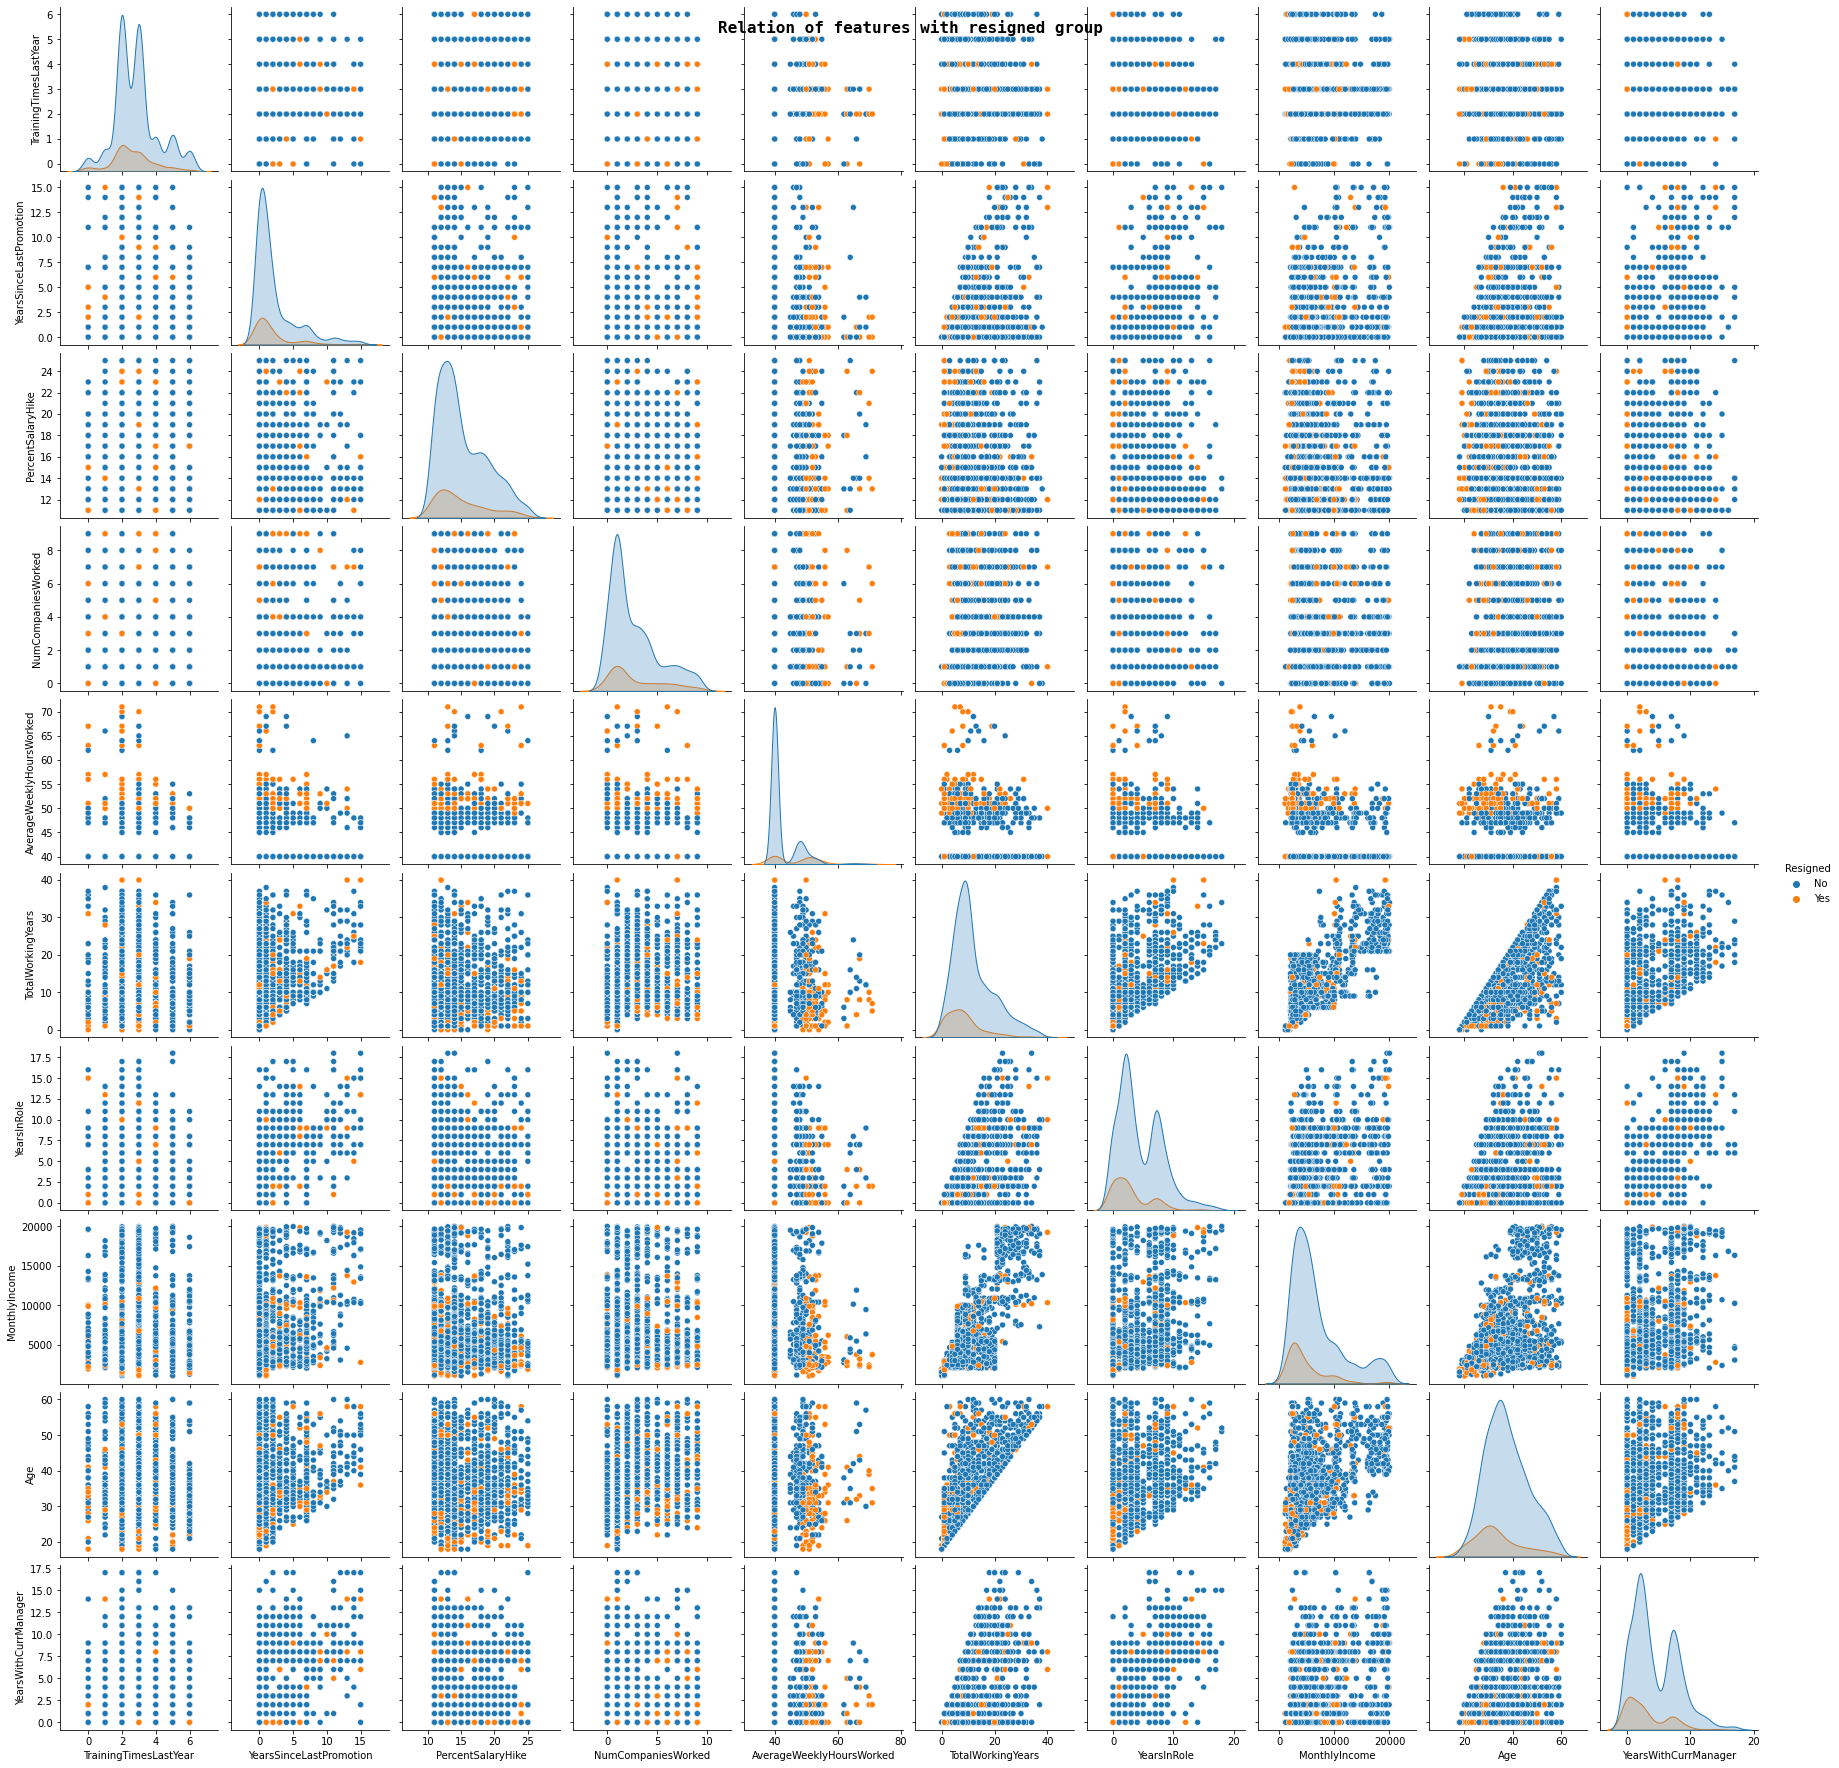

In [22]:
# plot the relationship among selected features

plt.figure(figsize=(12,8))

sns.pairplot(Employee_df[['Resigned','TrainingTimesLastYear','YearsSinceLastPromotion','PercentSalaryHike','NumCompaniesWorked','AverageWeeklyHoursWorked',
                          'TotalWorkingYears','YearsInRole','MonthlyIncome','Age','YearsWithCurrManager']], hue='Resigned')

plt.suptitle('Relation of features with resigned group', fontsize=16, fontweight ='bold', fontfamily='monospace')

plt.show()

fig.savefig('fig_17.jpg')

The pair plot data distribution analysis among various features shown below demonstrated that the employee trunover appears to be high in average working hours of 50 and above, in  young employees with lower monthly income between and the first few years with the current manager.These features were analyzed further to get a much clearer picture of the data and the significant features.

Let’s take a look at some of most significant correlations with aim to find the best features.

In [23]:
# Find correlations with resigned and sort

Employee_df_temp= Employee_df.copy()

Employee_df_temp['Target'] = Employee_df_temp['Resigned'].apply(
    lambda x: 0 if x == 'No' else 1)

Employee_df_temp = Employee_df_temp.drop(['Resigned'], axis=1)

correl= Employee_df_temp.corrwith(Employee_df_temp['Target']).sort_values()

print('Most Positive Correlations: \n', correl.tail(5))

print('\n Most Negative Correlations: \n', correl.head(5))

Most Positive Correlations: 
 TrainingTimesLastYear      -0.059478
YearsSinceLastPromotion    -0.033019
PercentSalaryHike          -0.013478
NumCompaniesWorked          0.043494
AverageWeeklyHoursWorked    0.318613
dtype: float64

 Most Negative Correlations: 
 TotalWorkingYears      -0.171063
YearsInRole            -0.160545
MonthlyIncome          -0.159840
Age                    -0.159205
YearsWithCurrManager   -0.156199
dtype: float64


Average weekly hours and number of campanies worked are positively correlated to employee resignation, suggesting that people tend to leave a company more when they are working more hours.
Salary increase, promotion, training are negatively correlated suggesting that employees who receive an increase in salary, promotion and training tend to stay.


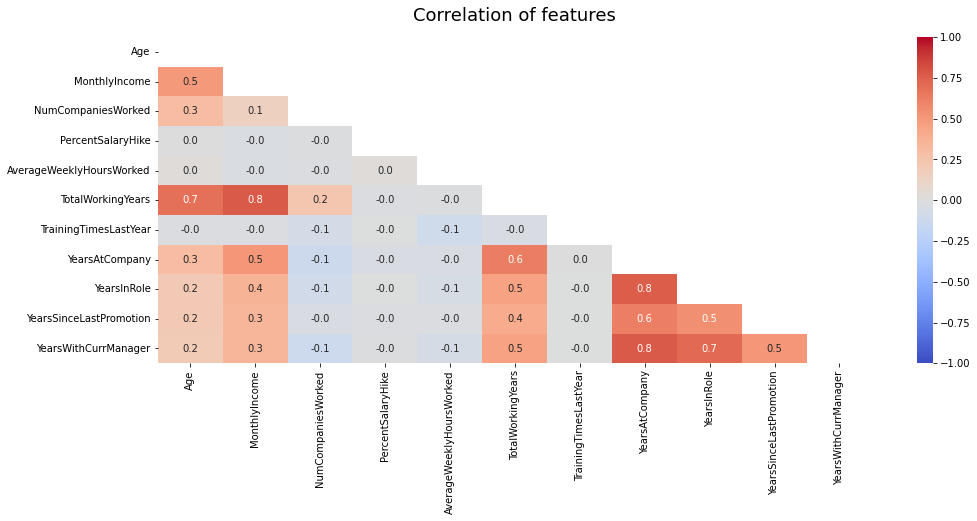

In [24]:
# Calculate correlation between selected columns/features using heatmap

plt.figure(figsize=(16, 6))

mask = np.triu(np.ones_like(Employee_df_temp.corr(), dtype=np.bool_))

# Plot heat map

heatmap = sns.heatmap(Employee_df_temp.corr(), mask=mask,vmin=-1,vmax=1, 
                      annot=True, cmap='coolwarm',fmt= '0.1f')

heatmap.set_title('Correlation of features', fontdict={'fontsize':18}, pad=16)

plt.savefig('heatmap.png', dpi=300)

The correlation matrix heatmap above illustrates correlations among some variables.It ranges from -1(blue) to 1(red), where 1 is direct correlation(change in one characteristic directly affects the other) and -1 is indirect correlation (change in one characteristic inversely affects that of the other). It is worth to note that correlation coefficients only measure linear correlations.

From the heatmap, there is a strong positive correlation between monthly income and total working years which could mean that the employees with greater seniority generally tend to earn more.

Based on our correlation analysis so far, monthly income, average hours worked, salary hike, years at company', and total working years appears to have an effect on high staff turnover. Hence, in the following steps, we will look at these feature in relation to employee resignation. 


## Monthly income by resignation

In [25]:
# Explore resignation by monthly income

(mu, sigma) = norm.fit(Employee_df.loc[Employee_df['Resigned'] == 'Yes', 'MonthlyIncome'])

print(
    'Resigned employees: average monthly income = {:.1f} Dollars and standard deviation = {:.1f}'.format(mu, sigma))
(mu, sigma) = norm.fit(Employee_df.loc[Employee_df['Resigned'] == 'No', 'MonthlyIncome'])
print('Current exmployees: average monthly income = {:.1f} Dollars and standard deviation = {:.1f}'.format(
    mu, sigma))

Resigned employees: average monthly income = 4787.1 Dollars and standard deviation = 3632.5
Current exmployees: average monthly income = 6832.7 Dollars and standard deviation = 4816.3


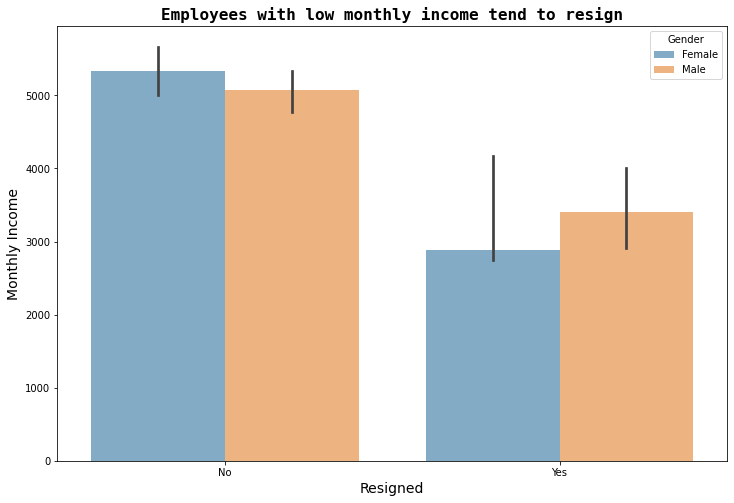

In [26]:
# Generate bar graph for resignation by monthly income and gender 

plt.figure(figsize=(12,8))

sns.barplot(data=Employee_df, x = 'Resigned',
            y = 'MonthlyIncome',
            hue = 'Gender',
            estimator = np.median,
            ci = 95,alpha=0.6)

plt.title('Employees with low monthly income tend to resign', fontsize=16, fontweight ='bold', fontfamily='monospace')

plt.xlabel("Resigned", size=14)

plt.ylabel("Monthly Income", size=14)

plt.show()

fig.savefig('fig_6.jpg')

As we can see clearly, average monthly income in resigned employee(4787.1 dollars) is signficantly lower than the average salary of current employees(6832.7). The resignations progressively increases for lower salaries. This is also more evident in females gender group which could be due to pay gaps.

## Average Weekly Hours worked and resignation

In [27]:
(mu, sigma) = norm.fit(Employee_df.loc[Employee_df['Resigned'] == 'Yes', 'AverageWeeklyHoursWorked'])

print(
    'Resigned employees: average hours worked = {:.1f} hrs and standard deviation = {:.1f}'.format(mu, sigma))
(mu, sigma) = norm.fit(Employee_df.loc[Employee_df['Resigned'] == 'No', 'AverageWeeklyHoursWorked'])
print('Current exmployees: average hours worked = {:.1f} hrs and standard deviation = {:.1f}'.format(
    mu, sigma))

Resigned employees: average hours worked = 47.0 hrs and standard deviation = 7.3
Current exmployees: average hours worked = 42.3 hrs and standard deviation = 4.6


In [28]:
Employee_df.loc[Employee_df['Resigned'] == 'Yes', 'AverageWeeklyHoursWorked'].describe()

count    237.000000
mean      46.957806
std        7.324089
min       40.000000
25%       40.000000
50%       50.000000
75%       52.000000
max       71.000000
Name: AverageWeeklyHoursWorked, dtype: float64

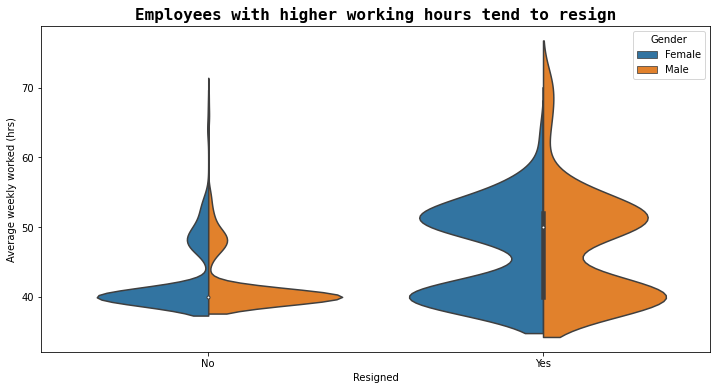

In [29]:
# Plot Average weekly hours worked

plt.figure(figsize=(12,6))

sns.violinplot(data=Employee_df, x='Resigned', y='AverageWeeklyHoursWorked', hue='Gender', split=True)

plt.title('Employees with higher working hours tend to resign', fontsize=16, fontweight ='bold', fontfamily='monospace')

plt.ylabel('Average weekly worked (hrs)')

plt.show()

## Salary hike and resignation

Salary hike 

In [30]:
Employee_df.loc[Employee_df['Resigned'] == 'Yes', 'PercentSalaryHike'].describe()

count    237.000000
mean      15.097046
std        3.770294
min       11.000000
25%       12.000000
50%       14.000000
75%       17.000000
max       25.000000
Name: PercentSalaryHike, dtype: float64

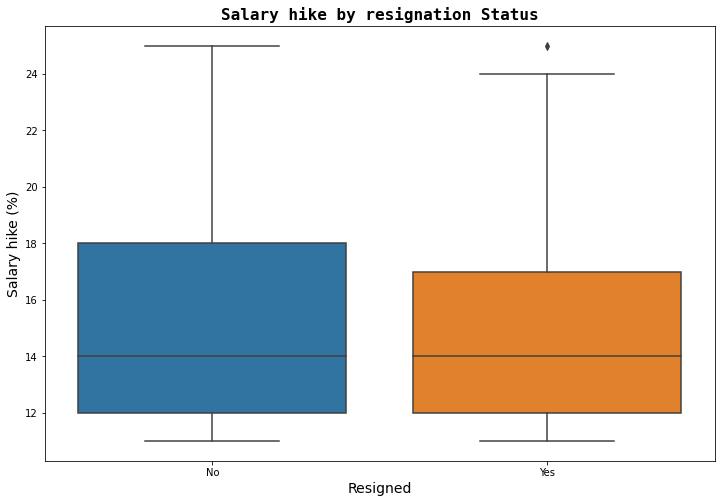

In [31]:
plt.figure(figsize=(12,8))

sns.boxplot(data=Employee_df, y='PercentSalaryHike', x= 'Resigned')

plt.title('Salary hike by resignation Status', fontsize=16, fontweight ='bold', fontfamily='monospace')

plt.xlabel("Resigned", size=14)

plt.ylabel("Salary hike (%)", size=14)

plt.show()

fig.savefig('fig_8.jpg')



## Total working years and resignation

 A violin plot has been ploted to explore how expreince level can affect the resignation of employees at the company.

## Total working years and resignation

In [32]:
# Total working years

print('\n Summary statistics of total working years for ex-employee:') 

print(Employee_df.loc[Employee_df['Resigned'] == 'Yes', 'TotalWorkingYears'].describe())

print('\n Summary statistics of total working years for current employee:') 
Employee_df.loc[Employee_df['Resigned'] == 'No', 'TotalWorkingYears'].describe()


 Summary statistics of total working years for ex-employee:
count    237.000000
mean       8.244726
std        7.169204
min        0.000000
25%        3.000000
50%        7.000000
75%       10.000000
max       40.000000
Name: TotalWorkingYears, dtype: float64

 Summary statistics of total working years for current employee:


count    1233.000000
mean       11.862936
std         7.760719
min         0.000000
25%         6.000000
50%        10.000000
75%        16.000000
max        38.000000
Name: TotalWorkingYears, dtype: float64

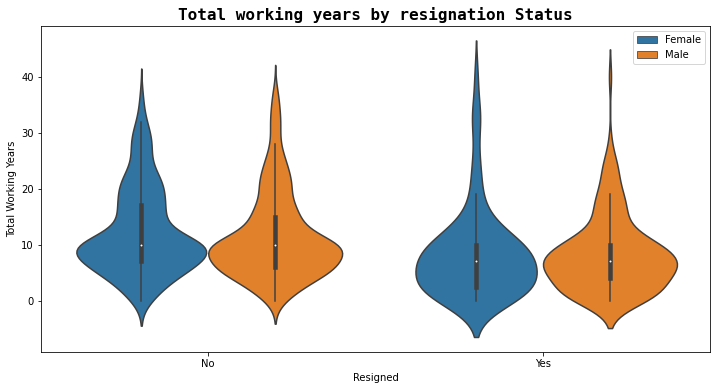

In [33]:
# Total working years

plt.figure(figsize=(12,6))

sns.violinplot(data=Employee_df, x='Resigned', y='TotalWorkingYears', hue='Gender')

plt.legend()

plt.ylabel('Total Working Years')

plt.title('Total working years by resignation Status',fontsize=16, fontweight ='bold', fontfamily='monospace')

plt.show()

In general, it is possible to observe that employees with fewer years of experience(mean= 8.24 years) are more likely to leave the company. In fact, as shown in the above graph, 75% of resigned employees are in categories of total working years up to 10 years irrespective of gender.Staff turnover progressively decreases as the total working time with the company increases from the 12 years onwards.

## Time spent in the company and resignation

A kde plot has been plotted to explore whether newer employees leave at a certain level.  

In [34]:
# 'YearsAtCompany' and resignation

print('\n Summary statistics of years at the company for ex-employee:')

print(Employee_df.loc[Employee_df['Resigned'] == 'Yes', 'YearsAtCompany'].describe())

print('\n Summary statistics of years at the company for current employee:')

Employee_df.loc[Employee_df['Resigned'] == 'No', 'YearsAtCompany'].describe()


 Summary statistics of years at the company for ex-employee:
count    237.000000
mean       5.130802
std        5.949984
min        0.000000
25%        1.000000
50%        3.000000
75%        7.000000
max       40.000000
Name: YearsAtCompany, dtype: float64

 Summary statistics of years at the company for current employee:


count    1233.000000
mean        7.369019
std         6.096298
min         0.000000
25%         3.000000
50%         6.000000
75%        10.000000
max        37.000000
Name: YearsAtCompany, dtype: float64

Text(0.5, 1.0, 'Time spent at the company by resignation Status')

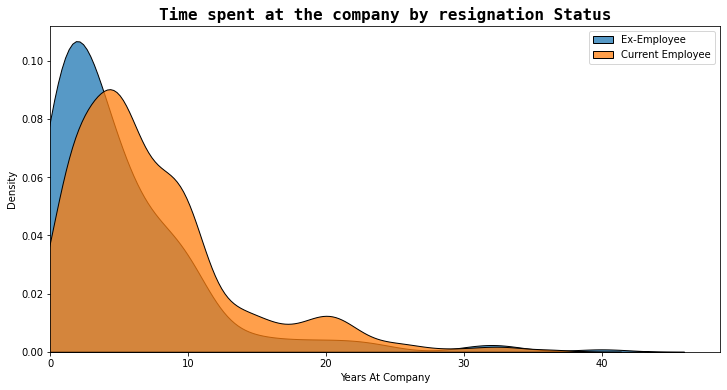

In [35]:
# plot 'YearsAtCompany' and resignation

plt.figure(figsize=(12,6))

sns.kdeplot(Employee_df.loc[Employee_df['Resigned'] == 'Yes', 'YearsAtCompany'], label = 'Ex-Employee',multiple="stack")

sns.kdeplot(Employee_df.loc[Employee_df['Resigned'] == 'No', 'YearsAtCompany'], label = 'Current Employee',multiple="stack")

plt.xlabel('Years At Company')

plt.legend()

plt.xlim(left=0)

plt.ylabel('Density')

plt.title('Time spent at the company by resignation Status',fontsize=16, fontweight ='bold', fontfamily='monospace')

As shown from above chart, employees in the first few years are tend to leave the company. We reported that almost half of the ex-employees (50%) left the company in the first 3 years compared to 6 years for the current employees.

## Pre-processing for machine learning

The first step for modelling is pre-processing of the data as most of machine learning algorithms typically perform well on numerical values as their predictor variables. Hence, we performed Label encoding to represent categorical labels with numerical values.  
We also standardize all the features in our data by scaling as clustering algorithms are sensitive to the scale of the features.  By standardizing, we aligned data to the mean of zero and standard deviation of one. The KNN and DBSCAN clustering algorithms were applied to the data and obtained the cluster assignments.


##  Encoding (Categorical Variables)


Most of machine learning algorithms typically perfrom well on numerical values as their predictor variables. Hence, we performed Label encoding to encode categorical labels with numerical values.

In [36]:
# Encode categorical values

encoded = Employee_df.copy()
for i in encoded:
    if encoded.dtypes[i] == "int64":
        continue
    else:
        for j in range(0,np.unique(encoded[i]).size):
            for k in range(0,len(encoded)):
                encoded[i] = encoded[i].replace(to_replace=encoded[i][k], value=j)

assert encoded.shape == Employee_df.shape, 'The encoded version of data should have the same shape'


## Feature Scaling

Since the features in our data are not on the same scale, we performed standardizing the entire dataset.By scaling our features we align all the features to a mean of zero and a standard deviation of one.

In [37]:
# Perform feature scaling for better performance
scaler = StandardScaler()
scaled_data=scaler.fit_transform(encoded.copy().drop('Resigned', axis=1))
scaled_data.shape

(1470, 20)

#  Data Modelling

## K_Means Clustering

K_Means modelling can group large amounts of data with quick and efficient computation time (Syakur M et al 2018; Bain KK et al. 2016). One of the limitations of K-Means is that the number of clusters should be specified at the beginning which has an impact on the result. To overcome this shortcoming, the best value of k was determined using WCSS and silhouette method for a range of values of k (2 to 20) for all data set. 

### WCSS (Elbow method)

Before modelling, the best value of k was determined using the elbow method which runs K-means clustering on the dataset for a range of values of k ( 2 to 20).Then, for each K values, we calculate average distances to the centroid across all data points.Using the selected k, we will then create and fit a new model.

Text(0.5, 1.0, 'Elbow Method to choose k')

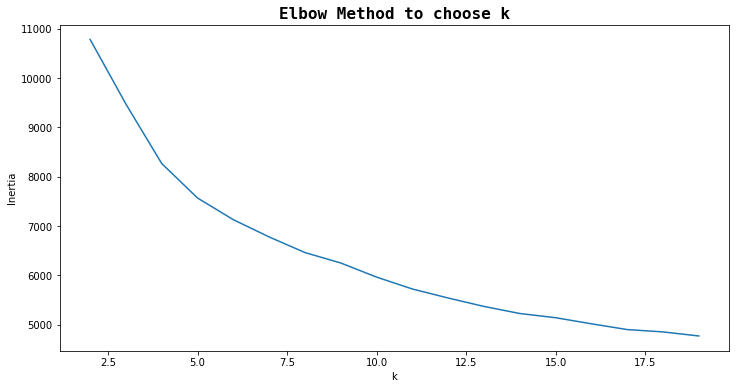

In [38]:
# Using the elbow method to find the optimal number of clusters

inertia = []

for k in range(2,20):
    model = KMeans(random_state=11, n_clusters=k,init="k-means++").fit(scaled_data)
    inertia.append(model.inertia_)

plt.figure(figsize=(12, 6))

plt.plot(range(2,20), inertia)

plt.xlabel('k')

plt.ylabel('Inertia')

plt.title("Elbow Method to choose k",fontsize=16, fontweight ='bold', fontfamily='monospace')

In the above plot, the elbow is at k = 4 (i.e Sum of squared distances falls suddenly) indicating the optimal k for this dataset is 4. In combination with the Elbow Method,the silhouette method is used for more confident decision.

### The silhouette method

In [39]:
# A list holds the silhouette coefficients for each k 

silhouette_coefficients = [] 

k_range = range(2, 20) 

for k in k_range: 

    km_model = KMeans(n_clusters=k, random_state=50,init="k-means++") 

    km_model.fit(scaled_data) 

    score = silhouette_score(scaled_data, km_model.labels_) 

    silhouette_coefficients.append(score) 

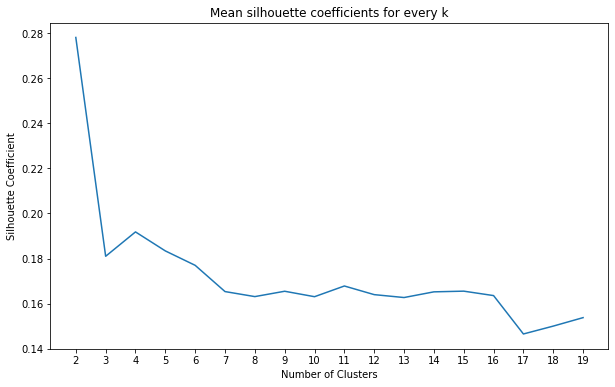

In [40]:
# plot the mean silhouette coefficients for every k

plt.figure(figsize=(10,6)) 

plt.plot(k_range, silhouette_coefficients) 

plt.xticks(k_range) 

plt.xlabel("Number of Clusters") 

plt.ylabel("Silhouette Coefficient")

plt.title('Mean silhouette coefficients for every k')

plt.show()

Similar to the WCSS (inertia), the silhouette coefecients provided us the optimum cluster of 4. We see that the silhouette score is maximized at k = 4. So, we will take 4 clusters.

## Modelling (K-Means)

With the aim of identifying clusters containing key indicators of staff turnover, we performed K-means for the cluster of interest, setting the optimum number of cluster at 4. Our interest of clusters for anlaysis would be those clusters which contain high and low percentage of staff turnover rate.

In [41]:
# Create groups using K-means clustering
Km_1 = KMeans(n_clusters = 4, random_state = 11).fit(scaled_data) # fit the model on the data, without the labels
centroids = Km_1.cluster_centers_
assignments = Km_1.labels_

In [42]:
# Add the cluster to the data
Employee_df['Cluster'] = assignments
pivot = Employee_df.pivot_table(index='Cluster', aggfunc=np.mean)


In [43]:
counter0=0
counter1=0
counter2=0
counter3=0
percentages=[]
for i in range(0,Employee_df['Cluster'].size):
    if(Employee_df['Cluster'][i] == 0):
        counter0+=1
    if(Employee_df['Cluster'][i] == 1):
        counter1+=1
    if(Employee_df['Cluster'][i] == 2):
        counter2+=1
    if(Employee_df['Cluster'][i] == 3):
        counter3+=1
percentages.append(counter0/Employee_df['Cluster'].size)
percentages.append(counter1/Employee_df['Cluster'].size)
percentages.append(counter2/Employee_df['Cluster'].size)
percentages.append(counter3/Employee_df['Cluster'].size)
for i in range(len(percentages)):
    pivot.loc[i, '% of Resigned'] = percentages[i]*100   


In [44]:
pivot.sort_values(by='% of Resigned',axis=0).T

Cluster,0,3,1,2
Age,46.141935,35.872063,43.777494,30.073937
AverageWeeklyHoursWorked,42.774194,42.634465,43.312020,43.212569
MonthlyIncome,14846.593548,6081.404700,7620.938619,3602.813309
NumCompaniesWorked,2.974194,1.749347,5.023018,1.597043
PercentSalaryHike,15.154839,15.292428,15.319693,15.086876
TotalWorkingYears,25.232258,11.616188,14.043478,5.046211
TrainingTimesLastYear,2.670968,2.890339,2.754476,2.804067
YearsAtCompany,19.877419,10.104439,3.736573,3.493530
YearsInRole,9.264516,7.391645,2.240409,1.985213
YearsSinceLastPromotion,7.374194,3.566580,0.813299,0.719039


We can see from above table,cluster set 0 represents low staff turnover rate(10.5%), cluster set 1 and 3 medium staff turnover (26% each) and cluster 2, high turnover rate (36%).So, we should be more focused on those employees who fall under cluster two. Employees in this cluster 2 are younger,low monthly income, worked in few companies (average=1.5 companies), unexpreinced (mean 5 years total working years), newer to comapny (average=3.4 years at the company) and  worked fewer years withe current manager. 

Text(0.5, 1.0, 'Cluster size')

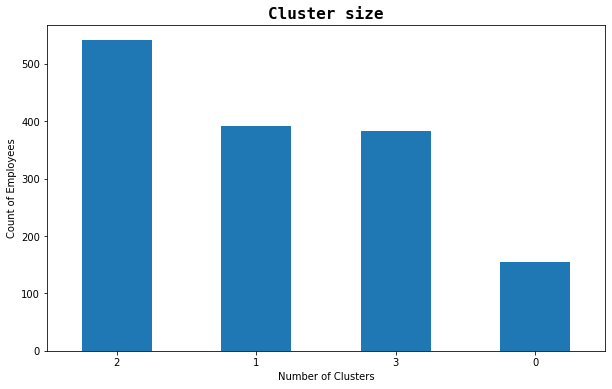

In [45]:
# Plot the proportions of cluster

plt.figure(figsize=(10,6)) 

Employee_df['Cluster'].value_counts().plot.bar(rot=0)

plt.xlabel("Number of Clusters") 

plt.ylabel("Count of Employees")

plt.title('Cluster size',fontsize=16, fontweight ='bold', fontfamily='monospace')

Clusters 2 and 0 presented the more extreme behaviors, with number of elements more divergent. In order to perform a more detailed analysis, the features used in the clustering process and which can adress employee enumeration, age groups, career progression, job satisfaction were analyzed, making comparisons between the four clusters visually. 


In [46]:
n_col = ['Age','AverageWeeklyHoursWorked','MonthlyIncome','YearsSinceLastPromotion','JobSatisfaction',
         'WorkLifeBalance','TrainingTimesLastYear','TotalWorkingYears','YearsAtCompany']

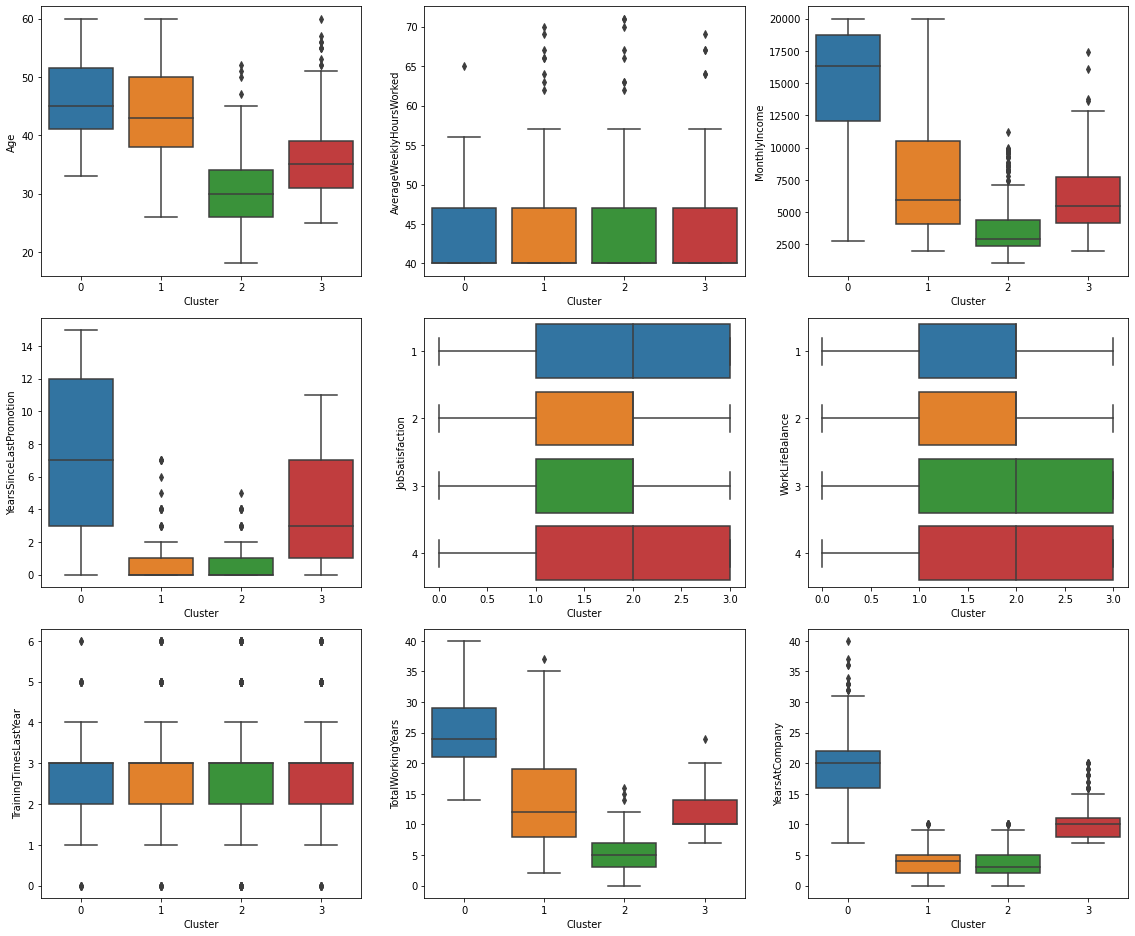

In [47]:
plt.figure(figsize=(16,17))
for idx,c in enumerate(n_col):
    plt.subplot(4,3,idx+1)
    sns.boxplot(data=Employee_df, x='Cluster',y=c)
    plt.subplots_adjust(hspace = 1.0)
    plt.tight_layout()
    

The following points can be deduced from the above clusters with high turnover rate respectively.

Cluster 0
* This cluster contains the lowest staff turnover rate (10.5%) and lowest number of employees.
* This cluster consist of mainly older (average age = 46.14) employees and do less overtime work (42.77 hours per week). 
*	They are paid the highest by the company (average = 14,846 per month). 
*	They are generally satisfied in their work environment and have the highest work life balance. 
*	Compared to other clusters, these employees are the most senior with an average of 19.8 years working at the company.
Cluster 1
*	A quarter of employee resigned in this cluster with a turnover rate (26.59%) and contain second largest cohort of employees.
*	This cluster contains employees in their age in late 30’s and 40’s (average age = 43.31 years) who are paid less at by half than cluster 0 (average=7620.93 monthly).  
*	They do less overtime as well (average=43.31 hours per week).
*	They are generally less satisfied in their work environment and have less work life balance. 
*	These are the newer employees with an average of 2.73 years working at the company.
Cluster 2
*	This cluster contains the highest staff turnover rate (36.8%) and highest number of employees
*	Compared to other clusters, this cluster primarily consist of the youngest employees in their late 20’s and early 30’s (average age = 30.07).
*	The employees tend to do overtime (average=43.77 hours per week) with highest outliers. 
*	They are paid the least by the company (average = 3602.81 per month) almost half of cluster 1 salary. 
*	They are generally less satisfied in their work environment but surprisingly they have high in work-life balance score. 
*	Employees in this cluster are less experienced with an average 5.04 years working experience. 
*	In addition, they are newer to company (average=3.49 years at the company) and appears to change the role frequently (average=1.9 years in role). 
Cluster 3
*	Similar to cluster 1, a quarter of employee resigned in this cluster with a turnover rate (26.05%) and contain similar number of employees.
*	However, the employees in this cluster are younger (average age = 35.87 years) compared cluster 1.
*	Their enumeration is less than cluster 1 (average=6081.40 per month).  
*	Similar to cluster 0, they do less overtime (average=42.61 hours per week).
*	Employees in this cluster are quite happy in their job and high work life balance through they chose to leave the company.  
*	They appeared to be in their mid-career with an average 11.6 total working years and average 10.10 years at the company.



## DBSCAN Clustering

DBSCAN depends on a density-based notion of clusters and specifically designed to discover clusters of arbitrary shape unlike k-means which can only identify spherical clusters (Chauhan N 2022). In this DBSCAN Clustering, the minimum points were set 20 (Dimension >= 1) to start the clustering on the full feature sets. The nearest neighbour’s estimator was fit to the dataset and the nearest neighbours was determined for every point.  A range eps values above and below this value were evaluated using silhouette method to get more confidence in this decision. 

### Elbow Method

Similar to Kmeans, before we apply the clustering algorithm we have to determine the appropriate epsilon level using the using the k-distance graph.

In [48]:
min_samples = 20

# create a new instance of NearestNeighbors and assign it to the variable nbrs

nbrs = NearestNeighbors(n_neighbors=20)

# Fit the nearest neighbors estimator

nbrs.fit(scaled_data)

# Find the 21 neighbors for every point

distances, indices = nbrs.kneighbors(scaled_data)

k_distance = distances[:,  min_samples-1] 

k_distance = np.sort(k_distance) 

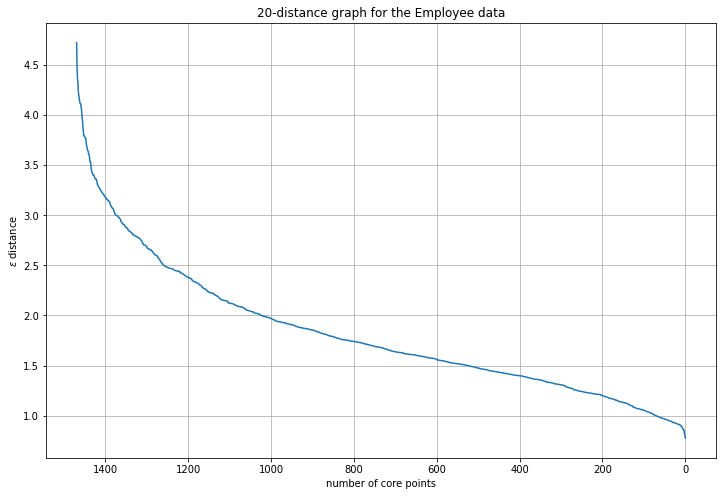

In [49]:
# Create and define the figure

plt.figure(figsize=(12,8)) 

plt.plot(k_distance)

plt.title(f"{min_samples}-distance graph for the Employee data")

plt.ylabel("$\epsilon$ distance")

plt.xlabel("number of core points")

plt.gca().invert_xaxis()

plt.grid(True)

plt.show()

The k distance graph, suggested the possible eps for DBSCAN at 3.3 with an elbow formation in the curve.

In [50]:
min_samples = 20
dbs_model = DBSCAN(eps=3.3, min_samples=min_samples) # create a DBSCAN model
dbs_model.fit(scaled_data) # fit the model on the data without the labels
clusters = dbs_model.labels_ # return a cluster for every sample from the data
clusters

array([0, 0, 0, ..., 0, 0, 0])

In [51]:
dbs_df = encoded
dbs_df['cluster'] = clusters
dbs_df.loc[:,['cluster','Resigned']].value_counts().sort_index().to_frame().rename({0:'count'}, axis=1)

,,count
cluster,Resigned,
-1,1,4
0,1,1466


Setting the epsilon to 3.3 and min_samples to 20 has resulted in 1 clusters (containing 1466 data points) and the rest 4 data points are considered outlier/noise.DBSCAN did not produce any signficant clusters and most employees belong to just one cluster. We are unable to desciribe this cluster as it is not informative. Let us make a slight change on the distance if there is a signficant change in number of clusters.

In [52]:
min_samples = 20
dbs_model = DBSCAN(eps=3.5, min_samples=min_samples) 
dbs_model.fit(scaled_data) 
clusters = dbs_model.labels_ 
clusters

array([0, 0, 0, ..., 0, 0, 0])

In [53]:
dbs_df = encoded
dbs_df['cluster'] = clusters
dbs_df.loc[:,['cluster','Resigned']].value_counts().sort_index().to_frame().rename({0:'count'}, axis=1)

,,count
cluster,Resigned,
-1,1,1
0,1,1469


In [54]:
min_samples = 20
dbs_model = DBSCAN(eps=2.5, min_samples=min_samples) 
dbs_model.fit(scaled_data) 
clusters = dbs_model.labels_ 
clusters

array([0, 0, 0, ..., 0, 0, 0])

In [55]:
dbs_df = encoded
dbs_df['cluster'] = clusters
dbs_df.loc[:,['cluster','Resigned']].value_counts().sort_index().to_frame().rename({0:'count'}, axis=1)

,,count
cluster,Resigned,
-1,1,75
0,1,1395


Increasing the epsilon to 3.5 and decreasing to 2.5 did not produce any signficant clusters. It is also important to understand that increasing epsilon decreases the number of clusters but each cluster will also begin to encompass more outlier/noise data points.

### The silhouette method

Now from above k-distance graph epsilon(eps) value will lie somewhere within 2.1 to 3.7. Using various possible eps values between 2.1 to 3.7. We can find the best eps value with highest silhouette score.

In [56]:
range_eps=[3.5,3.3,2.5]
for i in range_eps:
    print('Eps value is ' + str(i))
    dbs=DBSCAN(eps=i, min_samples=20).fit(scaled_data)
    core_samples_mask=np.zeros_like(dbs.labels_, dtype=bool)
    core_samples_mask[dbs.core_sample_indices_]=True
    labels=dbs.labels_
    print(set(labels))
    silhouette_avg=silhouette_score(scaled_data,labels)
    print('For eps value '+str(i), labels,
         'The Silhouette Coefficient is:', silhouette_avg)

Eps value is 3.5
{0, -1}
For eps value 3.5 [0 0 0 ... 0 0 0] The Silhouette Coefficient is: 0.47137297964483743
Eps value is 3.3
{0, -1}
For eps value 3.3 [0 0 0 ... 0 0 0] The Silhouette Coefficient is: 0.45933092906074735
Eps value is 2.5
{0, -1}
For eps value 2.5 [0 0 0 ... 0 0 0] The Silhouette Coefficient is: 0.39270981921776027


We ultimately want a high (ie. closest to 1) score which would indicate that there is a small intra-cluster average distance (tight clusters) and a large inter-cluster average distance (clusters well separated). Hence, the optimal eps value is 3.5 with the highest silhouette score of  0.47. It would seem however DBSCAN is not the optimal clustering algorithm for this particular dataset as the number of cluster is only one.

# Conclusion

This work tried to answer some of the common question such as what are the key employee turnover predictors and who likely to leave the company in the near future by clustering employee groups. This provided important insights for objective based decisions by the management.

The stronger indicators that people leaving include:
**Age**: Relatively young employees in their late 20’s and early 30’s (average age = 30.07) are more likely to leave the company. Hence, efforts should be made to describe precisely lack of or availability of opportunity for career advancement before hiring process, without raising false promise for growth. Once Joined the company, providing coaching for ways to advance and learn new skills would give the young employees a sense of direction and purpose.
**Monthly Income**: Unequal and low wage structures can lead some employees to leave the company. In our clustering analysis, people on lower wages (average = 3602.81 per month) are more likely to quit. The company should have a wage and job evaluation system based on industry benchmarks in the current local market. 
**Over time commitment**: Employees who do the most overtime work is more likely to leave the company. Understanding the requirements of overtime work and limiting the scope of projects with adequate man power would help to reduce overload.
**Total working and years at company**: Employee that had 4 to 7 years’ experience (average 5.04 years working experience) should be taken into account for higher risk of leaving. In addition, most of the new employees leave the company in their first two years (average 1.9 years at the company) of starting the role and should be identified as potential leavers. Both cohorts are also one of the least paid but do much of the work. Therefore, the business should make sure that it is paying fair going compensation and benefits that is current for their work. The company should also ensure that extra guidance and directions are in place for new employees who may need in learning unfamiliar job. 


# References

Bain, K, Firli, I, & Tri, S 2016, ‘Genetic Algorithm for Optimized Initial Centres K-Means Clustering: In SMEs’, Journal of Theoretical and Applied Information Technology (JATIT) 90 p 23

Chauhan, N 2022, ‘DBSCAN Clustering Algorithm in Machine Learning’, Blog post, April 4, 2022. Viewed 7 February 2023. <https://www.kdnuggets.com/2020/04/dbscan-clustering-algorithm-machine-learning.html>.

Syakur, M, Khotimah, B, Rochman, E, & Satoto, B 2018, ‘Integration k-means clustering method and elbow method for identification of the best customer profile cluster’. IOP Conference Series: Materials Science and Engineering, IOP Publishing, Vol.336, No.1, pp.12017.
